In [ ]:
# Se cargan las dependencias necesarias
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[[18439, -24426, -66], [17593, -18459, 1530], [16799, -2399, 12375], [18972, 17545, 19345], [19010, 27945, 11632], [14558, 21964, -7770], [13722, -11681, -15383], [17493, -21619, -4932], [18743, -24620, 296], [17467, -17527, 1202], [16909, -922, 13031], [19128, 18437, 20105], [18969, 27464, 10878], [13982, 21284, -9449], [10631, 3801, -18901], [14718, -12733, -13389], [18577, -24810, 33], [17059, -16669, 1765], [16983, 1746, 14525], [19801, 21197, 19686], [18110, 28366, 7602], [13270, 19140, -11506], [11259, 979, -17810], [15254, -15443, -12872], [17828, -22972, -3118], [18207, -24322, 3355], [17325, 4856, 15532], [19509, 23224, 18104], [18060, 27415, 5672], [12901, 17015, -13403], [10962, -796, -18910], [15950, -16980, -10624], [18115, -23304, -2394], [18382, -23085, 532], [16780, -12328, 4195], [19985, 24590, 19375], [16628, 26910, 2083], [11981, 13893, -15638], [11686, -3854, -17990], [16585, -18745, -8951], [18665, -24508, -918], [17661, -21873, -690], [16933, -9339, 7148], [18145,

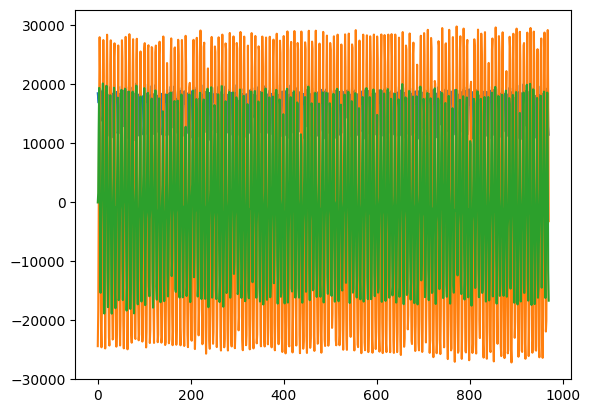

In [ ]:
RutaFile="/content/drive/MyDrive/pruebas/Training/No lubrication.json.5cdkuekr.ingestion-7689984996-rpt7l.json"
dataframe = pd.read_json(RutaFile)
#print(dataframe.to_string())
Valores = dataframe.iloc[:,:].values
#print(Valores.shape)
#print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pandas as pd


directory = '/content/drive/MyDrive/pruebas/Training/'


files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

num_classes = 5
files_per_class = cantidadFiles // num_classes

sequence_length = 64
sequence_stride = 10


all_spectral_features = []
all_labels = []

def extract_spectral_features(data, fs=49):
    features = []
    for axis_data in data.T:
        fft_result = np.fft.fft(axis_data)
        freqs = np.fft.fftfreq(len(axis_data), 1/fs)
        magnitude = np.abs(fft_result)
        positive_freqs = freqs[:len(freqs)//2]
        positive_magnitude = magnitude[:len(magnitude)//2]
        dominant_freq = positive_freqs[np.argmax(positive_magnitude)]
        total_energy = np.sum(positive_magnitude**2)
        low_band = np.sum(positive_magnitude[(positive_freqs < 10)]**2)
        mid_band = np.sum(positive_magnitude[(positive_freqs >= 10) & (positive_freqs < 20)]**2)
        high_band = np.sum(positive_magnitude[(positive_freqs >= 20)]**2)
        mean_amplitude = np.mean(positive_magnitude)
        std_amplitude = np.std(positive_magnitude)
        features.append([dominant_freq, total_energy, low_band, mid_band, high_band, mean_amplitude, std_amplitude])
    return np.concatenate(features)


for idx, file in enumerate(files):
    RutaFile = os.path.join(directory, file)

    dataframe = pd.read_json(RutaFile)
    Valores = dataframe.iloc[:, :].values
    DatosOriDF = Valores[7, 2][0:-1]
    DatosOriNP = np.array(DatosOriDF)


    Datos = DatosOriNP[0:970]
    Datos = Datos.reshape(-1, 3)


    current_class = idx // files_per_class


    dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=Datos,
        targets=None,
        sequence_length=sequence_length,
        sequence_stride=sequence_stride,
        batch_size=32,
    )


    X_windows = np.concatenate([x.numpy() for x in dataset], axis=0)


    n_samples, _, n_axes = X_windows.shape
    spectral_features = np.zeros((n_samples, 7 * n_axes))
    for i in range(n_samples):
        spectral_features[i, :] = extract_spectral_features(X_windows[i])

    labels = np.full((n_samples,), current_class)

    all_spectral_features.append(spectral_features)
    all_labels.append(labels)

all_spectral_features = np.vstack(all_spectral_features)
all_labels = np.concatenate(all_labels)





Forma de las ventanas: (9555, 64, 3)
Forma de las etiquetas: (9555,)


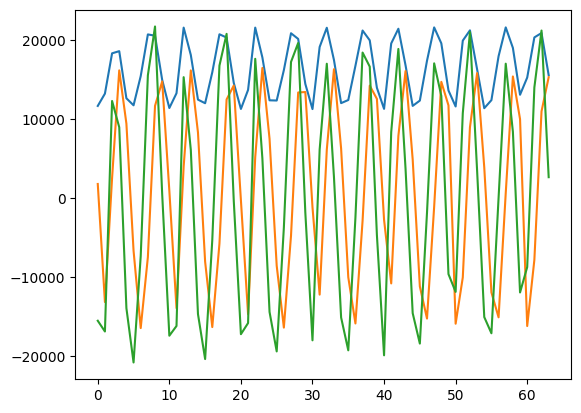

In [ ]:
plt.plot(all_windows[1500,:,:])

In [ ]:
labelsN = tf.keras.utils.to_categorical(all_labels, num_classes=5)
print(labelsN)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,733 (69.27 KB)

 Trainable params: 17,733 (69.27 KB)

 Non-trainable params: 0 (0.00 B)

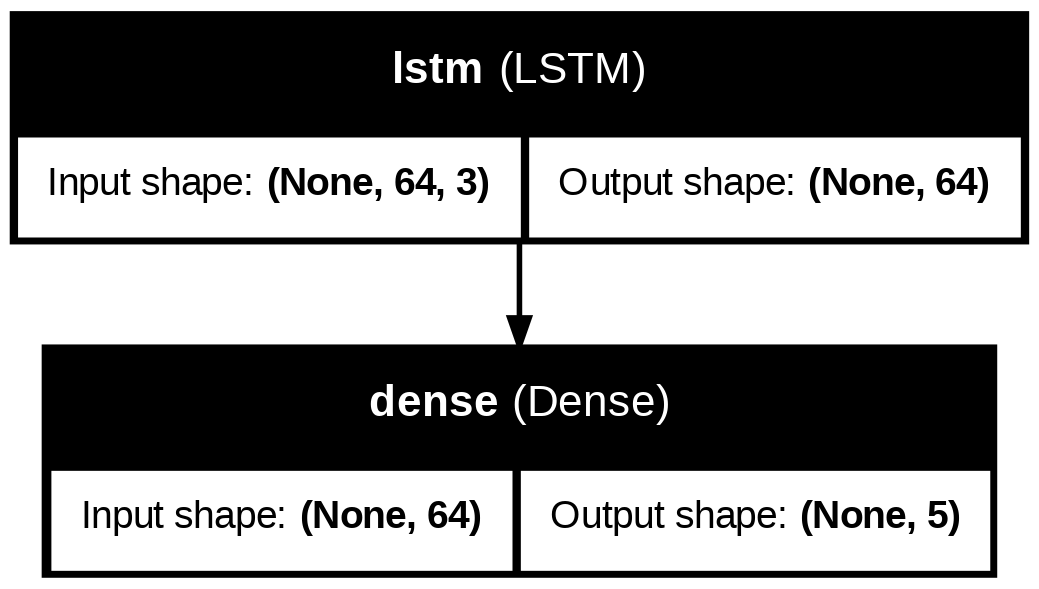

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

modelo_lstm = Sequential()
modelo_lstm.add(LSTM(64, input_shape=(64, 3)))
modelo_lstm.add(Dense(5, activation='softmax'))  # 5 clases

modelo_lstm.summary()

modelo_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

keras.utils.plot_model(modelo_lstm, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    all_windows, labelsN, test_size=0.20, random_state=42
)

In [ ]:
historia = modelo_lstm.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.4458 - loss: 1.3756 - val_accuracy: 0.7509 - val_loss: 0.8132
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.7630 - loss: 0.7854 - val_accuracy: 0.8373 - val_loss: 0.6073
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7968 - loss: 0.6225 - val_accuracy: 0.8535 - val_loss: 0.4768
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8594 - loss: 0.4676 - val_accuracy: 0.8425 - val_loss: 0.4424
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8465 - loss: 0.4497 - val_accuracy: 0.8514 - val_loss: 0.4255
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8440 - loss: 0.4378 - val_accuracy: 0.8571 - val_loss: 0.3956
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.8700 - loss: 0.4217 - val_accuracy: 0.9163 - val_loss: 0.3322
Epoch 8/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9256 - loss: 0.3212 - val_

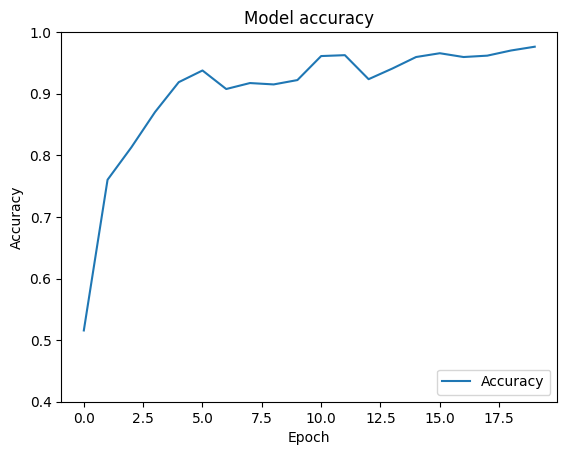

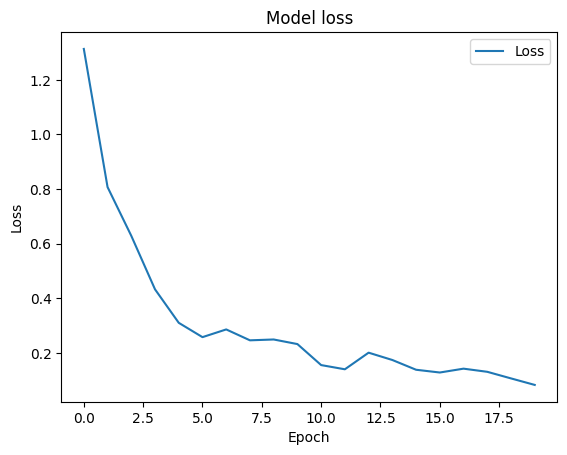

In [ ]:
plt.plot(historia.history['accuracy'], label='Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1)

plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia.history['loss'], label='Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
modelo_lstm.evaluate(X_val,y_val)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9785 - loss: 0.0815


[0.08441027253866196, 0.976452112197876]

In [ ]:

directory = '/content/drive/MyDrive/pruebas/Testing'

files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

num_classes = 5
files_per_class = cantidadFiles // num_classes


sequence_length = 64
sequence_stride = 10

all_windowsT = []
all_labelsT = []


for idx, file in enumerate(files):
    RutaFile = os.path.join(directory, file)

    dataframe = pd.read_json(RutaFile)
    Valores = dataframe.iloc[:, :].values
    DatosOriDF = Valores[7, 2][0:-1]
    DatosOriNP = np.array(DatosOriDF)

    Datos = DatosOriNP[0:970]
    Datos = Datos.reshape(-1, 3)

    current_class = idx // files_per_class

    dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=Datos,
        targets=None,
        sequence_length=sequence_length,
        sequence_stride=sequence_stride,
        batch_size=32,
    )

    X_windowsT = np.concatenate([x.numpy() for x in dataset], axis=0)

    labelsT = np.full((X_windowsT.shape[0],), current_class)

    all_windowsT.append(X_windowsT)
    all_labelsT.append(labelsT)

all_windowsT = np.vstack(all_windowsT)
all_labelsT = np.concatenate(all_labelsT)

print(f"Forma de las ventanas: {all_windowsT.shape}")
print(f"Forma de las etiquetas: {all_labelsT.shape}")

Forma de las ventanas: (4095, 64, 3)
Forma de las etiquetas: (4095,)


In [ ]:
print(all_windowsT[0,:,:].shape)
print(all_windowsT[0,:,:])
reshaped=all_windowsT[0,:,:].reshape(-1)
print(reshaped.shape)

(64, 3)
[[ 11027   9972 -17491]
 [ 12762  -7448 -16066]
 [ 17328 -20034  -5219]
 [ 17695 -13280   8914]
 [ 19009   8573  19056]
 [ 19755  25293  12544]
 [ 14533  21609  -9538]
 [ 10265   4714 -19302]
 [ 14799 -12224 -12584]
 [ 18149 -21910  -1989]
 [ 17776 -21767   1663]
 [ 17631  -7972  11483]
 [ 19902  14245  20280]
 [ 12834  18517 -13908]
 [ 10326    128 -19638]
 [ 16031 -16236 -10158]
 [ 18743 -23075    -88]
 [ 17481 -19326   2971]
 [ 17657  -1972  14556]
 [ 20390  19423  18747]
 [ 17722  25467   2578]
 [ 11604  13609 -16311]
 [ 16954 -18851  -7652]
 [ 18868 -23609   1789]
 [ 17418 -15746   6548]
 [ 18189   5075  17543]
 [ 20378  24019  15282]
 [ 16001  23095  -5452]
 [ 10711   7002 -18147]
 [ 13406 -10047 -15469]
 [ 17505 -20947  -4675]
 [ 18478 -22883   2821]
 [ 19326  11040  19417]
 [ 19365  26068  10623]
 [ 13721  20168 -11369]
 [ 10728   1721 -18530]
 [ 15118 -14981 -12014]
 [ 18046 -22551  -1593]
 [ 17856 -20504   3326]
 [ 17631  -4447  14107]
 [ 20182  17706  18952]
 [ 11909

In [ ]:
predicciones = modelo_lstm.predict(all_windowsT,batch_size=4095)
clases_predichas = np.argmax(predicciones, axis=1)

print(clases_predichas.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(4095,)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = all_labelsT

y_pred = clases_predichas

matriz_confusion = confusion_matrix(y_true, y_pred)

print("Matriz de Confusión:")
print(matriz_confusion)


Matriz de Confusión:
[[819   0   0   0   0]
 [  5 775   0  39   0]
 [  0   0 819   0   0]
 [  1  26   0 792   0]
 [  0   4   0   0 815]]


In [ ]:
print("\nReporte de Clasificación:")
print(classification_report(y_true, y_pred))



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       819
           1       0.96      0.95      0.95       819
           2       1.00      1.00      1.00       819
           3       0.95      0.97      0.96       819
           4       1.00      1.00      1.00       819

    accuracy                           0.98      4095
   macro avg       0.98      0.98      0.98      4095
weighted avg       0.98      0.98      0.98      4095



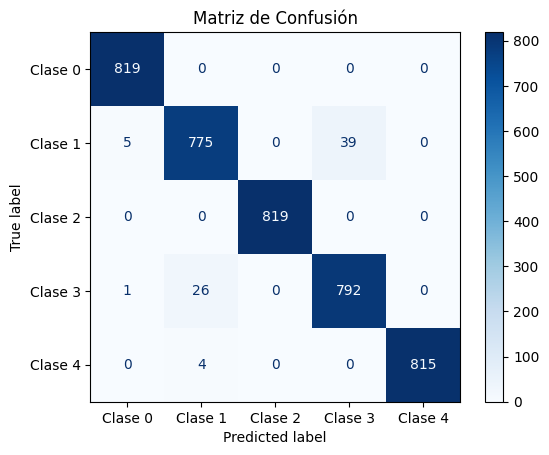

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4'])

disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
from sklearn.metrics import recall_score, f1_score
# Recall
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Recall: 0.9816849816849818
F1-score: 0.9816671764168586


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9817


# Model deployment

In [ ]:
# Nombre del modelo TensorFlow Lite
TF_LITE_MODEL_NAME = "lstm3.tflite"

# Crear un modelo de ejemplo (asegúrate de que `modelo` esté definido correctamente en tu caso)
# modelo = ...

# Definir las dimensiones de entrada
BATCH_SIZE = 1
STEPS = 64
INPUT_SIZE = 3

# Crear la función concreta
run_model = tf.function(lambda x: modelo_lstm(x))

# Crear el `concrete_func` con las especificaciones de entrada
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], modelo_lstm.inputs[0].dtype))

# Guardar el modelo utilizando `export` para obtener el formato SavedModel
MODEL_DIR = "modelo_keras_lstm"
modelo_lstm.export(MODEL_DIR)

# Convertir el modelo a TensorFlow Lite usando el `concrete_func`
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)

# Habilitar operaciones específicas de TensorFlow
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Operaciones básicas de TensorFlow Lite
    tf.lite.OpsSet.SELECT_TF_OPS  # Permite operaciones de TensorFlow
]

# Habilitar recursos de variables
converter.experimental_enable_resource_variables = True

# Deshabilitar la conversión de operaciones TensorList (si no es necesario)
converter._experimental_lower_tensor_list_ops = False

tflite_model = converter.convert()

# Guardar el modelo convertido
with open(TF_LITE_MODEL_NAME, 'wb') as f:
    f.write(tflite_model)

print(f"Modelo convertido y guardado en {TF_LITE_MODEL_NAME}")


Saved artifact at 'modelo_keras_lstm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  135725479305008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135725479350288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135725466791504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135725466795728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135725466829392: TensorSpec(shape=(), dtype=tf.resource, name=None)
Modelo convertido y guardado en lstm3.tflite


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelo_lstm)

converter._experimental_lower_tensor_list_ops = False

converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
converter.experimental_enable_resource_variables = True
converter.experimental_new_converter = True


tflite_model = converter.convert()

with open("lstm1.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpu_w0a3ou'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137161247455216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137161192744112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137161192746576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137161192749216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137161192749920: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
!python -m pip install edgeimpulse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.3
    Uninstalling pydantic-2.10.3:
      Successfully

In [ ]:
import edgeimpulse as ei
ei.API_KEY = "ei_xxxxxxxx"

download_dir = "./"
deploy_filename = "RedLSTMQtzd.zip"
deploy_bytes = None

try:
  deploy_bytes = ei.model.deploy(tflite_model, model_output_type= ei.model.output_type.Classification(),deploy_target="arduino")

except Exception as e:
  print(f"could not deploy model: {e}")

if deploy_bytes is not None:
  with open(deploy_filename, "wb") as f:
    f.write(deploy_bytes.getvalue())